In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench.util import utilities

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [3]:
from ema_workbench import (Model, Policy, ema_logging, SequentialEvaluator, MultiprocessingEvaluator, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, Scenario, perform_experiments)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
import time
from dike_model_function import DikeNetwork


In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x00000200E05CD3A0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x00000200E05CD3A0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x00000200E05CD3A0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x00000200E05CD3A0>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x00000200E05CD3A0>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x00000200E05CD3A0>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=6)

print(type(results))


[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 1000 scenarios * 20 policies * 1 model(s) = 20000 experiments
100%|████████████████████████████████████| 20000/20000 [39:51<00:00,  8.36it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


<class 'tuple'>



Eens kijken of het lukt om het te printen naar csv

In [9]:

import pandas as pd

results_df = {1,3,4,5}
results_pdf = pd.DataFrame(results_df, columns=['Result'])

print(results_pdf)

#results_pdf.to_csv('.../results/outcomes_sc50p4.csv', index=False)


   Result
0       1
1       3
2       4
3       5


In [11]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())

experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,17,345.712502,10.0,0.728638,37.722265,1.5,0.959779,227.275706,1.5,0.428011,...,6,1,4,9,3,4,1,20,0,dikesnet
1,86,72.464352,1.5,0.054115,154.943361,10.0,0.344173,132.677822,1.0,0.044889,...,6,1,4,9,3,4,1,21,0,dikesnet
2,27,348.743540,10.0,0.061011,160.344607,1.5,0.691151,128.020377,1.5,0.045851,...,6,1,4,9,3,4,1,22,0,dikesnet
3,55,324.660415,10.0,0.990353,285.584226,1.5,0.105428,175.956893,10.0,0.935988,...,6,1,4,9,3,4,1,23,0,dikesnet
4,29,181.220933,1.0,0.975884,48.845047,1.0,0.673831,144.279642,10.0,0.437092,...,6,1,4,9,3,4,1,24,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,35,262.970915,10.0,0.287774,57.969460,1.5,0.408155,64.167570,1.0,0.522788,...,2,8,8,10,9,7,4,1015,19,dikesnet
19996,131,270.584914,1.5,0.777523,78.742453,1.0,0.118731,189.723536,1.0,0.745762,...,2,8,8,10,9,7,4,1016,19,dikesnet
19997,86,196.029769,1.0,0.533157,347.659111,1.5,0.877057,115.858408,1.0,0.460251,...,2,8,8,10,9,7,4,1017,19,dikesnet
19998,29,339.859540,1.5,0.688389,261.123535,1.5,0.242347,295.586514,10.0,0.749624,...,2,8,8,10,9,7,4,1018,19,dikesnet


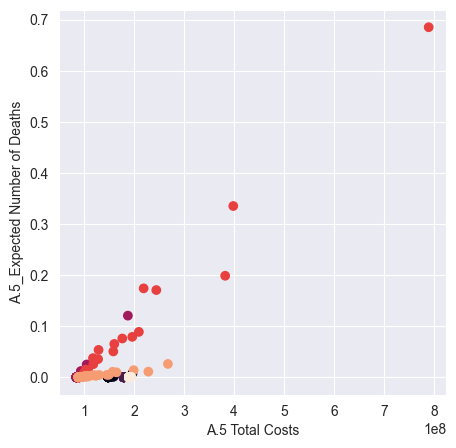

In [12]:

## Jeanine code scatterplot
fig, axs = plt.subplots(1, figsize=(5, 5))

axs.set_ylabel('A.5_Expected Number of Deaths')
axs.set_xlabel('A.5 Total Costs')
axs.scatter(outcomes['A.5 Total Costs'], outcomes['A.5_Expected Number of Deaths'], c=experiments.policy)

unique_policies = experiments.policy.unique()
labels = [f'Policy {policy}' for policy in unique_policies]

#legend = axs.legend(*plt.scatter.legend_elements(), labels=labels, title='Policies')

plt.show()

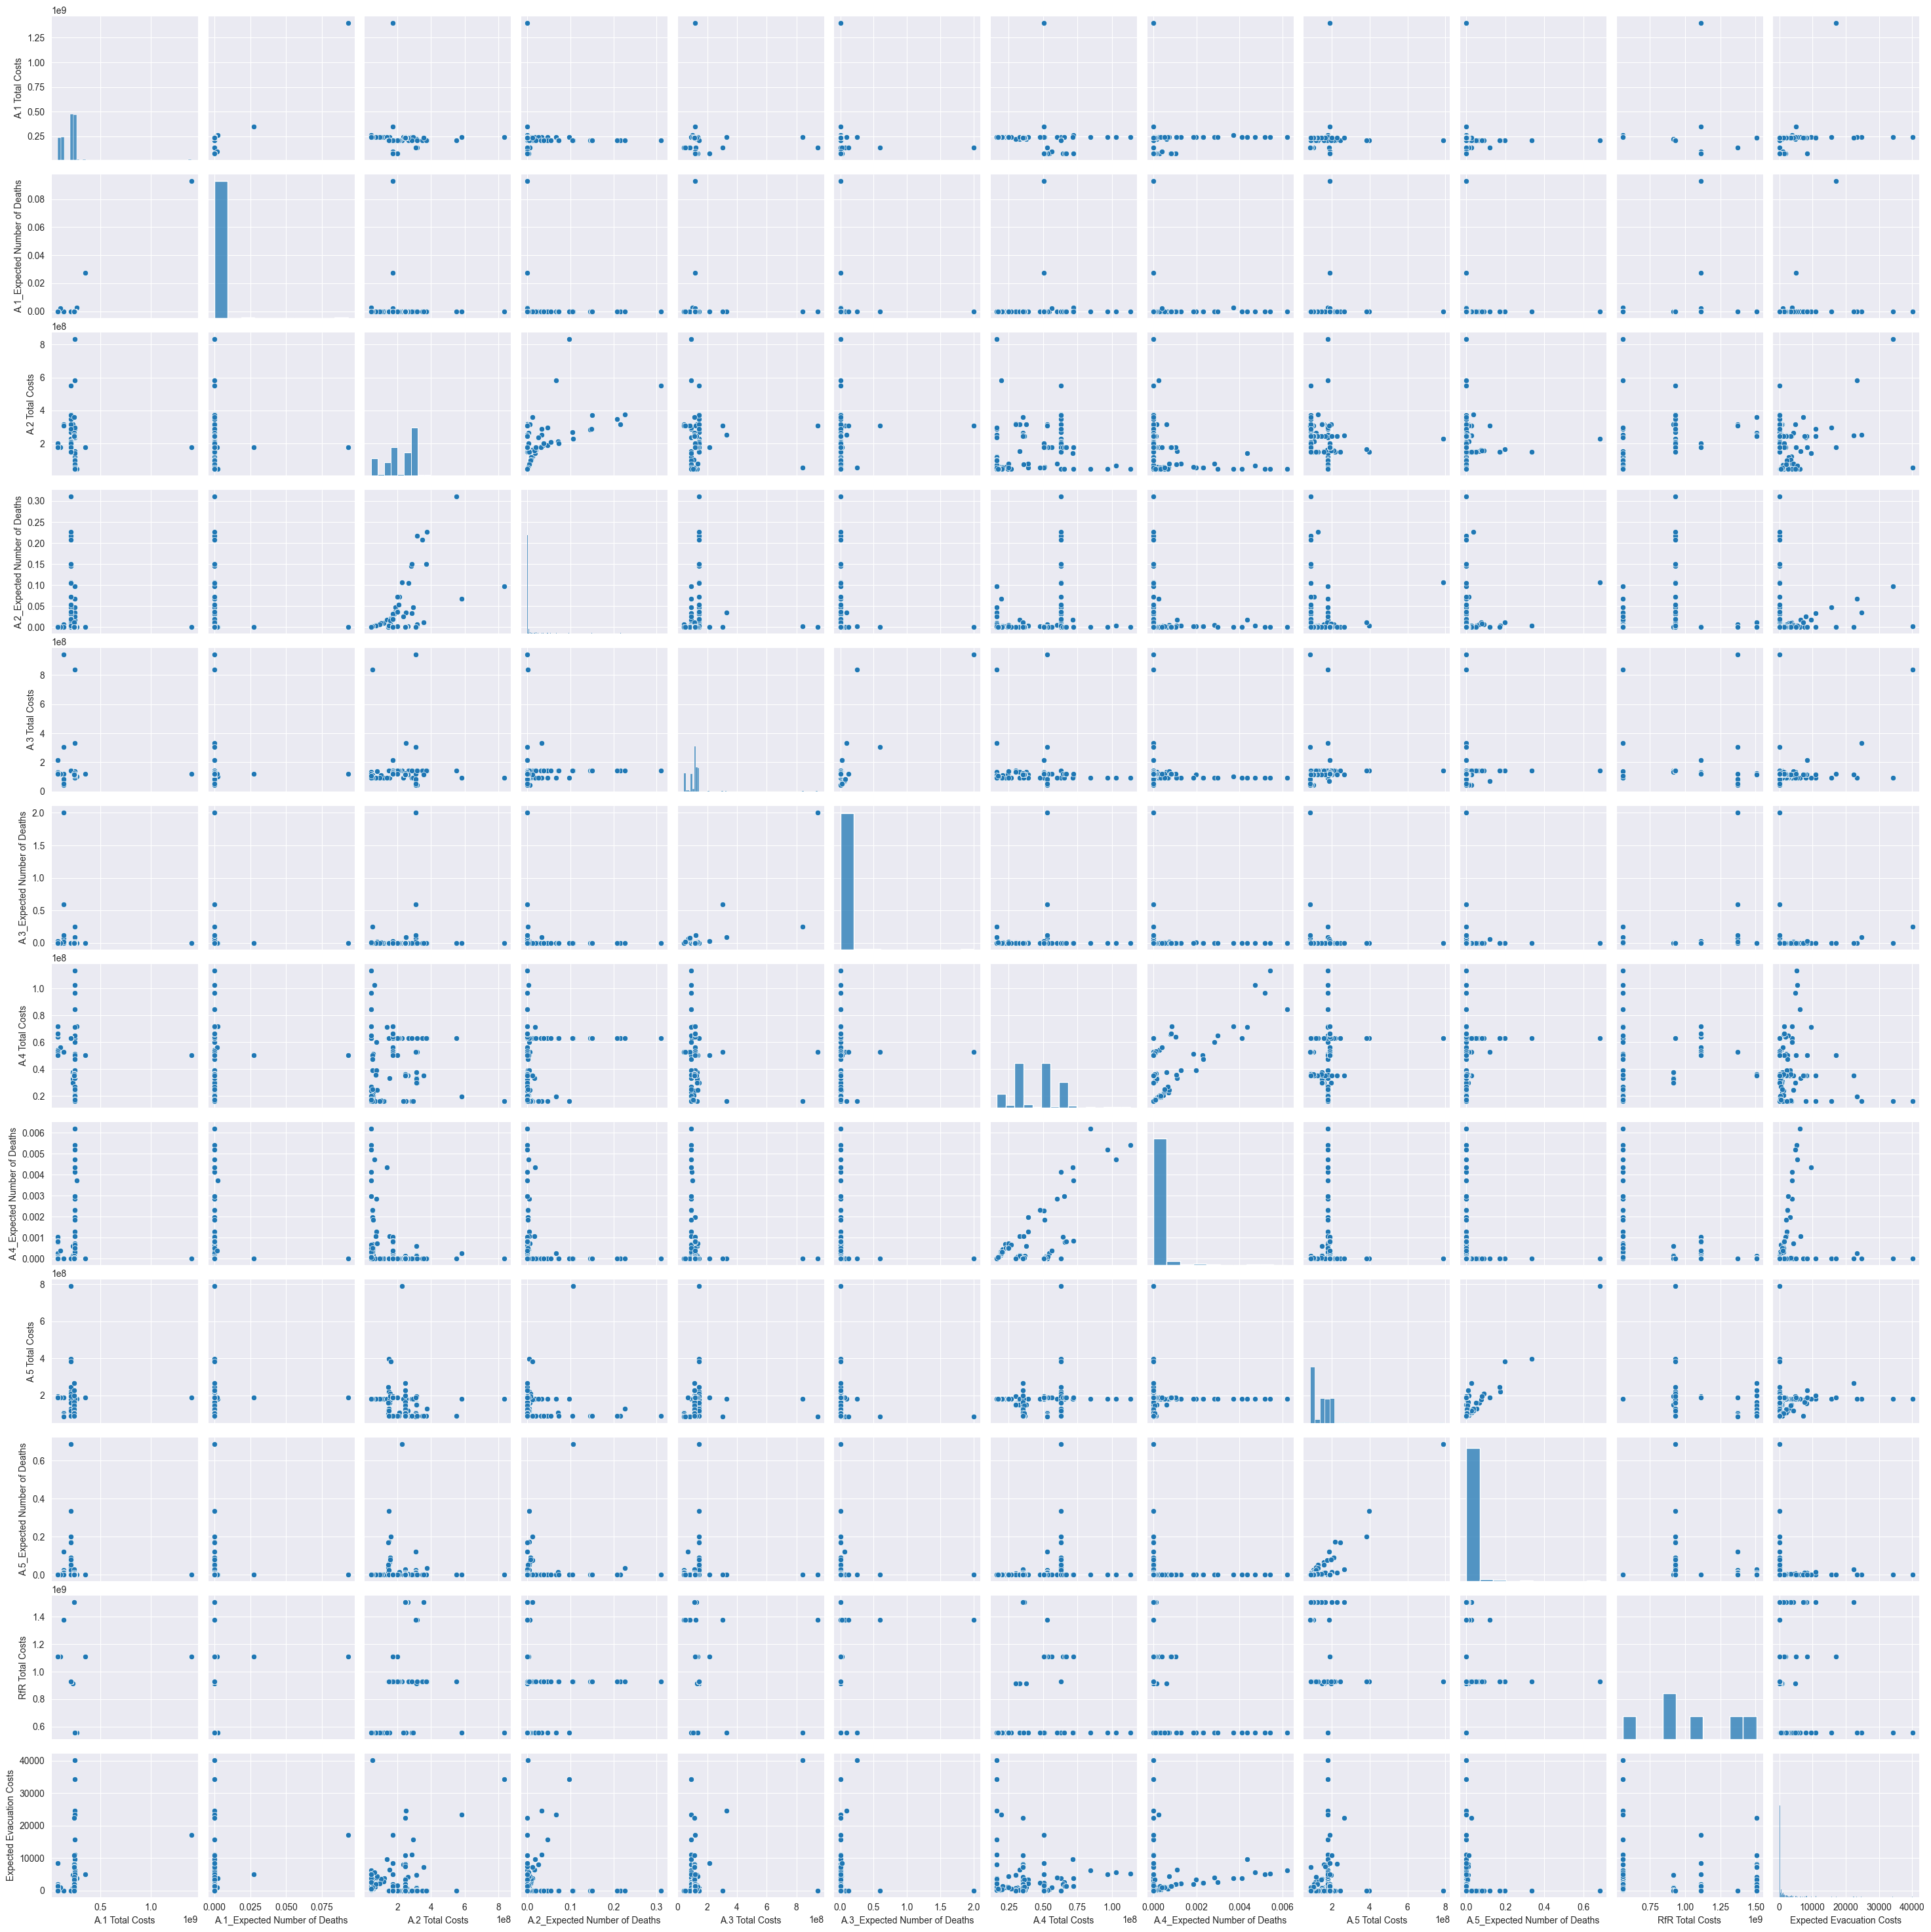

In [13]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

In [15]:
## Jeanine code worst
worst_A5 = np.where(outcomes['A.5_Expected Number of Deaths'] == np.amax(outcomes['A.5_Expected Number of Deaths']))
experiments.loc[worst_A5]


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
181,128,175.917571,1.5,0.934954,193.015477,1.0,0.046922,344.48866,10.0,0.26959,...,9,1,9,4,1,6,2,35,3,dikesnet


In [19]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

In [20]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:42<00:00,  7.12it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [ ]:
# only works because we have scalar outcomes
df_experiments = pd.DataFrame(experiments)
df_experiments.to_csv('./experiments/experiments_open_exploration.csv')

In [ ]:
experiments, outcomes = results

In [ ]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)